In [1]:
import skimage as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PATH_IMG = '../data/landmarks/aligned/before_4/'

In [69]:
df = pd.read_csv('../data/landmarks/aligned/labels/reformated_8698.csv')

In [70]:
del df['Unnamed: 0']

In [71]:
df_filenames = np.array(df['filename'])
col = df.columns
df_coord = np.array([[int(df[col[i]][j]) for i in range(1,len(col))] for j in range(len(df))])

In [97]:
idx = 0
img = sk.io.imread(PATH_IMG+df_filenames[idx])
coord = df_coord[idx]

In [73]:
coord

array([122, 175, 230, 185, 149, 319])

In [8]:
h, w, c = img.shape
while h < w:
    img = sk.io.imread(PATH_IMG+df_filenames[idx])
    h, w, c = img.shape
    
    idx += 1

In [9]:
idx

806

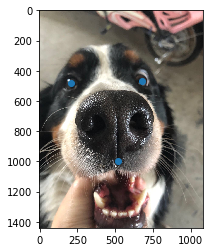

In [10]:
plt.imshow(img)
plt.plot(coord[::2],coord[1::2], 'o')
plt.show()

In [90]:
def clipping(img, coord):
    h, w, c = img.shape
    if h < w:
        bound_min = min(coord[::2])
        bound_max = max(coord[::2])
        if bound_max - bound_min > h:
            print("Shit happens sometimes... {:d} {:d} {:d}".format(bound_max, bound_min, h))
        clip = w - h
        d = bound_min
        D = w - bound_max
        left = int(d*clip/(d+D))
        right = bound_max + D - int(D*clip/(d+D))
        
        coord_add = np.copy(coord)
        coord_add[::2] -= left
        return img[:,left:right,:], np.array(coord_add)
    elif h > w:
        new_coord = []
        for i in range(3):
            new_coord += [coord[2*i+1]] + [coord[2*i]]
            
        img_T = np.transpose(img, axes=(1,0,2))
        img_clipped, coord_add = clipping(img_T, new_coord)
        
        coord_add_T = []
        for i in range(3):
            coord_add_T += [coord_add[2*i+1]] + [coord_add[2*i]]
        
        return np.transpose(img_clipped, axes=(1,0,2)), np.array(coord_add_T)
    else:
        return img, coord

In [93]:
def resize(img, coord, output_shape):
    img_resized = sk.transform.resize(img, output_shape)
    x_ratio = output_shape[0]/img.shape[0]
    y_ratio = output_shape[1]/img.shape[1]
    
    new_coord = np.zeros(6)
    for i in range(3):
        new_coord[2*i] = int(coord[2*i]*x_ratio)
        new_coord[2*i+1] = int(coord[2*i+1]*y_ratio)
    return img_resized, new_coord

In [100]:
img_resized[:2]

array([[[0.54509804, 0.65882353, 0.29279587],
        [0.54507444, 0.6627451 , 0.29135764],
        [0.54104517, 0.66001401, 0.27767998],
        ...,
        [0.8597514 , 0.86851506, 0.71192227],
        [0.90767229, 0.91551542, 0.76897915],
        [0.90016428, 0.91059846, 0.77633053]],

       [[0.54117647, 0.66278887, 0.28627451],
        [0.54110644, 0.66278808, 0.28609069],
        [0.53722442, 0.66001401, 0.27292542],
        ...,
        [0.8359289 , 0.85323004, 0.68809977],
        [0.8583524 , 0.86635232, 0.71325436],
        [0.85204832, 0.8664916 , 0.72126225]]])

(375, 376, 3)


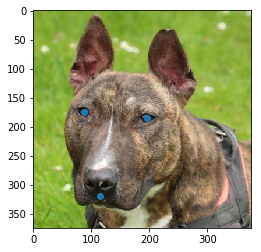

In [98]:
img_clipped, coord_clipped = clipping(img, coord)
print(img_clipped.shape)
plt.imshow(img_clipped)
plt.plot(coord_clipped[::2],coord_clipped[1::2],'o')
plt.show()

(224, 224, 3)


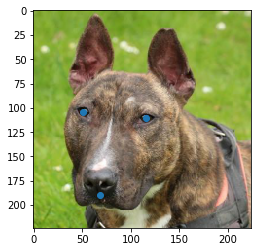

In [99]:
img_resized, coord_resized = resize(img_clipped, coord_clipped, (224,224,3))
print(img_resized.shape)
plt.imshow(img_resized)
plt.plot(coord_resized[::2],coord_resized[1::2],'o')
plt.show()